In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# import os
 
# def change_extension(file_path, new_extension):
#     base_name, _ = os.path.splitext(file_path)
#     new_file_path = base_name + "." + new_extension
#     os.rename(file_path, new_file_path)

In [46]:
# files = ['train_data.csv', 'test_data.csv', 'test_data_solution.csv', 'description.csv']
# for file in files:
#     change_extension(file , 'txt')

In [2]:
df = pd.read_table('train_data.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [3]:
df.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
df.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [5]:
df.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [6]:
df.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
54210    False
54211    False
54212    False
54213    False
54214    False
Length: 54214, dtype: bool

No Null Values And No Duplicates

In [7]:
test_data = pd.read_table('test_data.txt', sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [8]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [9]:
test_data.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [10]:
test_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54195    False
54196    False
54197    False
54198    False
54199    False
Length: 54200, dtype: bool

In [11]:
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

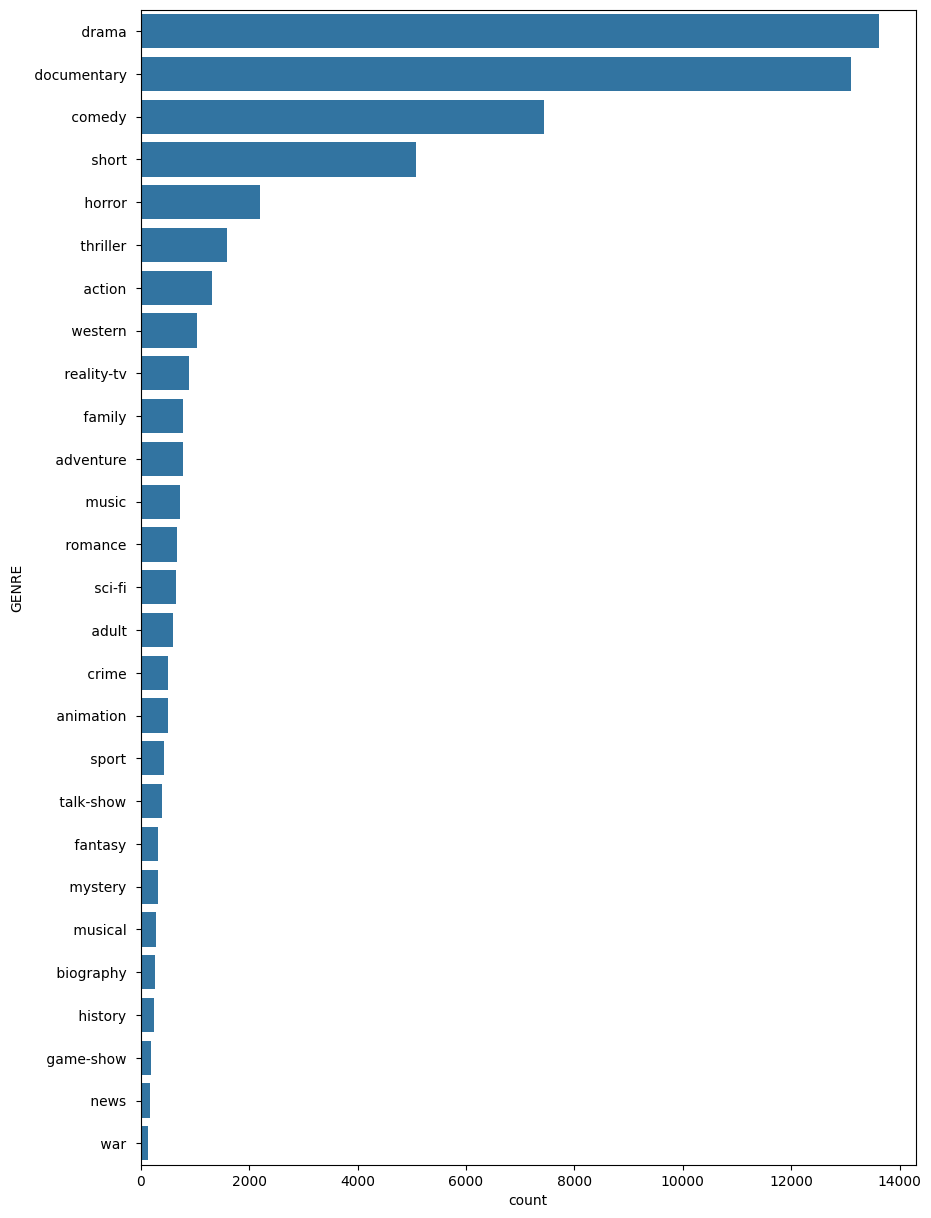

In [12]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y="GENRE", order= df["GENRE"].value_counts().index)
plt.show()

Data Preprocessing

In [13]:
import re
def clean_title(title):
    """Remove leading and trailing whitespace from a title."""
    res = re.sub("[^a-zA-Z0-9 ]", "", title)
    res = res.lower()
    return res

In [14]:
df['Cleaned Description'] = df['DESCRIPTION'].apply(clean_title)

In [15]:
df

,TITLE,GENRE,DESCRIPTION,Cleaned Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,the films title refers not only to the unreco...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,this shortlived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,the next generation of exploitation the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",ze bestaan echt is a standup comedy about gro...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter and vivian live in the country and hav...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned Description']).toarray()
y = df['GENRE']  # Target labels

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Hussein\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5880291432260445


c:\Users\Hussein\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.50      0.25      0.34       263
       adult        0.87      0.24      0.38       112
   adventure        0.40      0.13      0.20       139
   animation        0.58      0.07      0.12       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.56      1443
       crime        0.17      0.01      0.02       107
 documentary        0.67      0.86      0.75      2659
       drama        0.55      0.78      0.64      2697
      family        0.37      0.07      0.12       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.45      0.62        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.56      0.60       431
       music        0.66      0.51      0.57       144
     musical        0.67      0.04      0.08        50
     mystery        1.00      0.02      0.04        56
        n

c:\Users\Hussein\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hussein\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
